<a href="https://colab.research.google.com/github/rupangdalai/CodSoft/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

In [12]:
print("--- Training Data ---")
print("First 5 rows of Training Data:")
print(train_df.head())
print("\nShape of Training Data:", train_df.shape)

--- Training Data ---
First 5 rows of Training Data:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category      first     last  \
0          fraud_Rippin, Kub and Mann       misc_net   Jennifer    Banks   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  Stephanie     Gill   
2                fraud_Lind-Buckridge  entertainment     Edward  Sanchez   
3  fraud_Kutch, Hermiston and Farrell  gas_transport     Jeremy    White   
4                 fraud_Keeling-Crist       misc_pos      Tyler   Garcia   

  gender                        street            city  ...      long  \
0      F                561 Perry Cove  Moravian Falls  ...  -81.1781   
1

In [13]:
print("\n\n--- Testing Data ---")
print("First 5 rows of training data:")
print(test_df.head())
print("\nShape of testing data:", test_df.shape)



--- Testing Data ---
First 5 rows of training data:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category   first      last  \
0                 fraud_Kirlin and Sons   personal_care    Jeff   Elliott   
1                  fraud_Sporer-Keebler   personal_care  Joanne  Williams   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  Ashley     Lopez   
3                     fraud_Haley Group        misc_pos   Brian  Williams   
4                 fraud_Johnston-Casper          travel  Nathan    Massey   

  gender                       street        city  ...      long  city_pop  \
0      M            351 Darlene Green    Columbia  ...  -80.93

In [ ]:
print("\n\n--- Transaction Class Distribution (Training Data) ---")
print(train_df['is_fraud'].value_counts())



--- Transaction Class Distribution (Training Data) ---
is_fraud
0    1289169
1       7506
Name: count, dtype: int64


# Data Preprocessing

In [27]:
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

scaler = StandardScaler()

train_df['scaled_amt'] = scaler.fit_transform(train_df['amt'].values.reshape(-1, 1))
train_df['scaled_Time'] = scaler.fit_transform(train_df['unix_time'].values.reshape(-1, 1))

test_df['scaled_amt'] = scaler.transform(test_df['amt'].values.reshape(-1, 1))
test_df['scaled_Time'] = scaler.transform(test_df['unix_time'].values.reshape(-1, 1))

columns_to_drop = ['unix_time', 'amt', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'cc_num']
train_df.drop(columns_to_drop, axis=1, inplace=True)
test_df.drop(columns_to_drop, axis=1, inplace=True)


X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']

X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

print("Shape of Training Features:", X_train.shape)
print("Shape of Testing Features:", X_test.shape)

Shape of Training Features: (1296675, 8)
Shape of Testing Features: (555719, 8)


# Experimenting with Algorithms for clarrification


# Logistic Regression


--- Logistic Regression ---
Accuracy: 0.9961401355721147

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



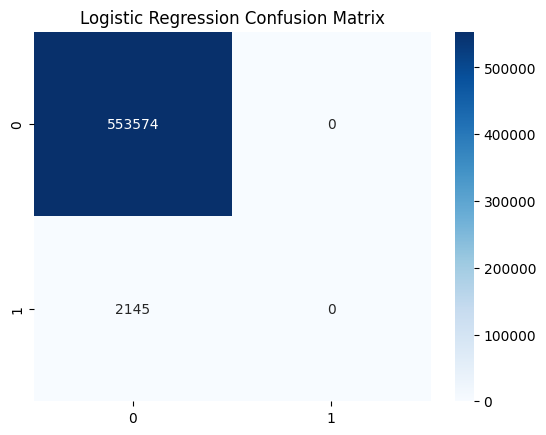

In [23]:
print("\n--- Logistic Regression ---")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, lr_preds))
print("\nClassification Report:\n", classification_report(y_test, lr_preds, zero_division=0))
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='g', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Decision Trees


--- Decision Tree Classifier ---
Accuracy: 0.5227570048891617

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.52      0.69    553574
           1       0.00      0.44      0.01      2145

    accuracy                           0.52    555719
   macro avg       0.50      0.48      0.35    555719
weighted avg       0.99      0.52      0.68    555719



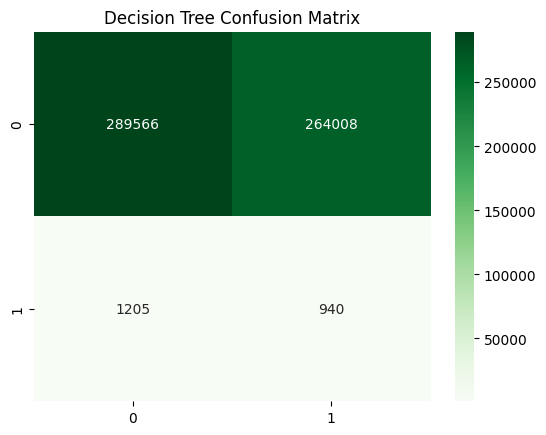

In [24]:
print("\n--- Decision Tree Classifier ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, dt_preds))
print("\nClassification Report:\n", classification_report(y_test, dt_preds, zero_division=0))
sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt='g', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Random Forest


--- Random Forest Classifier ---
Accuracy: 0.9947023585661099

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           0.99    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      0.99      0.99    555719



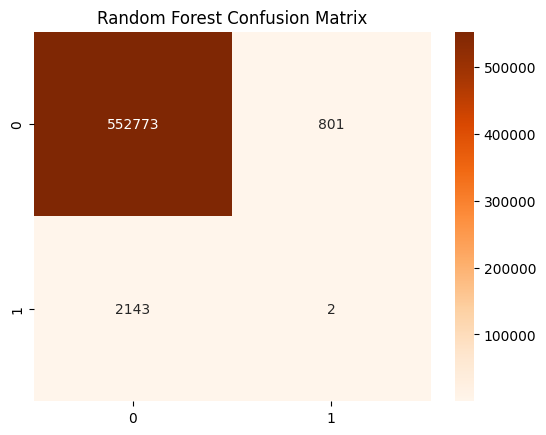

In [26]:
print("\n--- Random Forest Classifier ---")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds, zero_division=0))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='g', cmap='Oranges')
plt.title('Random Forest Confusion Matrix')
plt.show()